In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neural_network import MLPRegressor

/Users/zdx_macos/miniforge3/envs/conda-rdkit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
covid = pd.read_csv('us-counties-2020.csv')

In [3]:
covid[(covid['county'] == 'Unknown') & (covid['date'] == '2020-12-31')]

,date,county,state,fips,cases,deaths
881582,2020-12-31,Unknown,Alaska,NaN,218,0.0
881672,2020-12-31,Unknown,Arkansas,NaN,2819,0.0
881807,2020-12-31,Unknown,Connecticut,NaN,665,0.0
881812,2020-12-31,Unknown,Delaware,NaN,136,0.0
881877,2020-12-31,Unknown,Florida,NaN,3010,0.0
882026,2020-12-31,Unknown,Georgia,NaN,3623,6.0
882042,2020-12-31,Unknown,Guam,NaN,8286,123.0
882374,2020-12-31,Unknown,Iowa,NaN,694,0.0
882484,2020-12-31,Unknown,Kansas,NaN,0,408.0
882668,2020-12-31,Unknown,Louisiana,NaN,399,0.0


In [4]:
covid = covid[covid['county'] != 'Unknown']

In [5]:
covid['county_state'] = covid['county'] + ", " + covid['state']
covid

,date,county,state,fips,cases,deaths,county_state
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,"Cook, Illinois"
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
...,...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0,"Sweetwater, Wyoming"
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0,"Teton, Wyoming"
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0,"Uinta, Wyoming"
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0,"Washakie, Wyoming"


In [6]:
covid['county'].describe()

count         877254
unique          1929
top       Washington
freq            8777
Name: county, dtype: object

In [7]:
covid['state'].describe()

count     877254
unique        54
top        Texas
freq       67001
Name: state, dtype: object

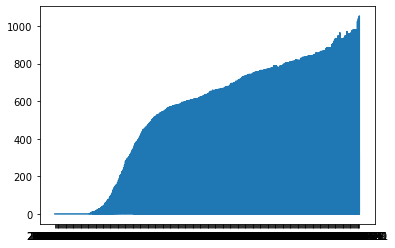

In [8]:
washington_data = covid[covid['state']=='Washington']
plt.plot(washington_data['date'],washington_data['deaths']);

In [9]:
def extract_time_range_data(start_date,end_date):
    diff_deaths = covid[covid['date'] == end_date].set_index('county_state')['deaths'] - covid[covid['date'] == start_date].set_index('county_state')['deaths']
    diff_cases = covid[covid['date'] == end_date].set_index('county_state')['cases'] - covid[covid['date'] == start_date].set_index('county_state')['cases']
    df = covid[covid['date'] == end_date].set_index('county_state')
    df['new_cases'] = diff_cases
    df['new_deaths'] = diff_deaths
    df.drop('cases',inplace=True,axis=1)
    df.drop('deaths',inplace=True,axis=1)
    df.drop('date',inplace=True,axis=1)
    return df

In [10]:
covid_tf = extract_time_range_data('2020-08-01','2020-12-31')
covid_tf = covid_tf.sort_values('new_cases')
covid_tf = covid_tf[~covid_tf['new_cases'].isna()]
covid_tf['mortality'] = covid_tf['new_deaths']/covid_tf['new_cases']
covid_tf.loc[covid_tf['new_cases']==0,'mortality'] = 0
covid_tf.loc[covid_tf['mortality']>=1,'mortality'] = 1
covid_tf


,county,state,fips,new_cases,new_deaths,mortality
county_state,,,,,,
"Tinian, Northern Mariana Islands",Tinian,Northern Mariana Islands,69120.0,1.0,0.0,0.000000
"Harding, New Mexico",Harding,New Mexico,35021.0,7.0,0.0,0.000000
"Hinsdale, Colorado",Hinsdale,Colorado,8053.0,10.0,0.0,0.000000
"Culebra, Puerto Rico",Culebra,Puerto Rico,72049.0,11.0,NaN,NaN
"Haines Borough, Alaska",Haines Borough,Alaska,2100.0,12.0,0.0,0.000000
...,...,...,...,...,...,...
"Miami-Dade, Florida",Miami-Dade,Florida,12086.0,177666.0,2541.0,0.014302
"New York City, New York",New York City,New York,NaN,200716.0,2137.0,0.010647
"Maricopa, Arizona",Maricopa,Arizona,4013.0,203154.0,3036.0,0.014944


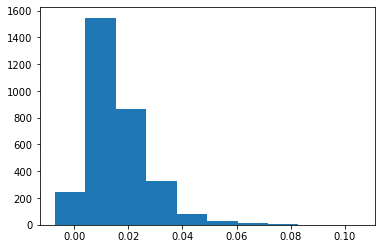

In [11]:
plt.hist(covid_tf['mortality']);

## Simply Analytics Data ###

In [12]:
demo = pd.read_csv('New Project 2_Ranking_2022-10-27_17-24-28.csv')
demo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 280 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [13]:
# demo_clean['Name']
# covid_tf[covid_tf.index.str.contains('Acadia')]

In [14]:
demo_clean = demo.drop(demo.columns[[1,2,3,4,5,6,7,9,21,23,25,30,31,32,33,34,46,47,48,58,65,66,80,93,94,]],axis=1)
demo_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 255 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [16]:
# demo_selected = demo_clean.iloc[:,0:1]
# demo_selected = demo_clean.iloc[:,1:2].merge(demo_clean.iloc[:,0],left_index=True,right_index=True)
demo_selected = demo_clean.iloc[:,1:58]
demo_selected.iloc[:,1:100] = demo_clean.iloc[:,1:100].div(demo_clean.iloc[:,1],axis=0)


ValueError: could not broadcast input array from shape (3222,99) into shape (3222,56)

In [ ]:
demo_selected['State'] = demo_clean['Name'].str[-2:]
demo_selected = pd.get_dummies(demo_selected,drop_first=True)
demo_selected

In [ ]:
# plot heatmap
demo_plot = demo_clean.loc[:,demo_clean.columns.str.contains('# Household')].div(demo_clean.iloc[:,1],axis=0)
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(demo_plot.corr()),annot=True, fmt=".2f",cmap='Blues');

## Merge 2nd set of Simply Analytics Data ##

In [17]:
demo2 = pd.read_csv('pop_density_household_size_bachelor_attainment.csv')
demo2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 12 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name                                                                      3220 non-null   object 
 1   FIPS                                                                      3220 non-null   int64  
 2   % Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]  3220 non-null   float64
 3   Population Density (per square mile), 2021 [Estimated]                    3220 non-null   float64
 4   % Household Size | 1-person household, 2021 [Estimated]                   3220 non-null   float64
 5   % Household Size | 2-person household, 2021 [Estimated]                   3220 non-null   float64
 6   % Household Size | 3-person household, 2021 [Estimated]         

In [18]:
demo2.iloc[:,[2,4,5,6,7,8,9,11]] = demo2.iloc[:,[2,4,5,6,7,8,9,11]]/100
demo_selected = demo_selected.merge(demo2.iloc[:,2:],left_index=True,right_index=True,how='inner')
demo_selected

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]","Population Density (per square mile), 2021 [Estimated]","% Household Size | 1-person household, 2021 [Estimated]","% Household Size | 2-person household, 2021 [Estimated]","% Household Size | 3-person household, 2021 [Estimated]","% Household Size | 4-person household, 2021 [Estimated]","% Household Size | 5-person household, 2021 [Estimated]","% Household Size | 6-person household, 2021 [Estimated]","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]"
0,24494.0,1245.0,1564.0,916.0,736.0,1663.0,2489.0,2540.0,3034.0,3515.0,...,0.172737,49.6310,0.322195,0.413428,0.090814,0.110925,0.037394,0.007437,0.4790,0.018942
1,62669.0,4488.0,4652.0,2690.0,1468.0,3739.0,8400.0,7425.0,7460.0,7920.0,...,0.145731,95.7722,0.237690,0.321698,0.158837,0.143103,0.090112,0.032961,0.4791,0.034838
2,32525.0,2004.0,1908.0,1117.0,492.0,1935.0,3475.0,3210.0,3652.0,5151.0,...,0.194525,72.1216,0.290439,0.371741,0.157603,0.080609,0.050535,0.023844,0.4480,0.095448
3,465948.0,29727.0,33603.0,20673.0,12204.0,28855.0,65534.0,64199.0,59161.0,55744.0,...,0.382892,452.3167,0.315286,0.346197,0.138452,0.109892,0.056727,0.019380,0.4615,0.086253
4,6965.0,396.0,442.0,268.0,103.0,350.0,772.0,714.0,790.0,1108.0,...,0.179435,12.0786,0.306025,0.403252,0.120816,0.085751,0.031240,0.031878,0.4298,0.025742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,76999.0,6104.0,5898.0,3099.0,1767.0,5586.0,12146.0,9526.0,7881.0,8675.0,...,0.150731,38.5523,0.214115,0.352553,0.144363,0.131406,0.090699,0.039721,0.4429,0.651439
3216,5282.0,488.0,322.0,228.0,117.0,283.0,718.0,600.0,504.0,722.0,...,0.225747,4.1977,0.214717,0.454041,0.097467,0.109771,0.069481,0.032569,0.4235,0.249068
3217,210821.0,14626.0,14539.0,8662.0,6061.0,18174.0,29084.0,22561.0,21164.0,20164.0,...,0.123845,14.3798,0.231796,0.281321,0.117368,0.205789,0.070782,0.045907,0.5641,0.945810
3218,9970.0,694.0,866.0,368.0,149.0,603.0,1190.0,1017.0,1231.0,1187.0,...,0.098139,9.3194,0.124038,0.312611,0.211368,0.129070,0.136471,0.049438,0.4146,0.936978


## Test-train split and model creation ##

In [29]:
x = demo_selected

labels = [col for col in demo.columns if "covid" in col.lower()]
y = demo[labels]
# y_lab = y[labels[11]]/y[labels[23]] # mortality
# y_lab = y[labels[11]]
y_lab = y[labels[11]].div(demo_clean.iloc[:,1]) # death percentage
# y_lab = y[labels[23]].div(demo_clean.iloc[:,1]) # case percentage

y_lab = y_lab.loc[x.index]


sum(y_lab.isna())
x = x.loc[~y_lab.isna(),:]
y_lab = y_lab.loc[~y_lab.isna()]

In [147]:
# clean up missing values
for l in labels:
    if l in x.columns:
        x = x.drop(l, axis=1)
bad_col = [c for c in x.columns if x[c].isna().sum() > 10]
x = x.drop(bad_col, axis=1)

for c in x.columns:
    x[c].fillna(value=x[c].mean(), inplace=True)

print(np.isinf(y_lab).sum())
print(y_lab.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(x, y_lab, test_size=0.15, random_state=42)

0
0


In [148]:
x.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3219
Data columns (total 128 columns):
 #   Column                                                                            Dtype  
---  ------                                                                            -----  
 0   # Total Population, 2020 [Estimated]                                              float64
 1   # Age | 5 to 9 years, 2020 [Estimated]                                            float64
 2   # Age | 10 to 14 years, 2020 [Estimated]                                          float64
 3   # Age | 15 to 17 years, 2020 [Estimated]                                          float64
 4   # Age | 18 and 19 years, 2020 [Estimated]                                         float64
 5   # Age | 20 to 24 years, 2020 [Estimated]                                          float64
 6   # Age | 25 to 34 years, 2020 [Estimated]                                          float64
 7   # Age | 35 to 44 years, 2020 [Es

In [149]:
X_test

,"# Total Population, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"% Educational Attainment | Bachelor's degree or higher, 2021 [Estimated]_y","Population Density (per square mile), 2021 [Estimated]_y","% Household Size | 1-person household, 2021 [Estimated]_y","% Household Size | 2-person household, 2021 [Estimated]_y","% Household Size | 3-person household, 2021 [Estimated]_y","% Household Size | 4-person household, 2021 [Estimated]_y","% Household Size | 5-person household, 2021 [Estimated]_y","% Household Size | 6-person household, 2021 [Estimated]_y","# Gini Index Of Income Inequality [B19083] | Gini Index, 2019_y","% Hispanic or Latino | Hispanic or Latino, 2021 [Estimated]_y"
1844,19042.0,0.068533,0.074204,0.043378,0.024892,0.062283,0.100672,0.123411,0.131079,0.134020,...,0.126007,55.1572,0.364631,0.318292,0.086058,0.151310,0.043367,0.019049,0.4515,0.031764
823,7650.0,0.064314,0.040523,0.031895,0.085621,0.075686,0.094641,0.103922,0.109020,0.139346,...,0.223905,19.3403,0.324623,0.376214,0.089112,0.092797,0.083752,0.017085,0.4324,0.033903
469,9392.0,0.077300,0.089757,0.044399,0.030771,0.062500,0.100298,0.094336,0.096678,0.125958,...,0.180759,8.5832,0.311047,0.339382,0.121617,0.124164,0.037568,0.030882,0.4368,0.041401
2634,8208.0,0.062865,0.052022,0.033626,0.029971,0.042519,0.108796,0.120492,0.101974,0.149366,...,0.163290,34.0664,0.331263,0.401065,0.086957,0.122449,0.023366,0.015380,0.6006,0.033119
2414,21766.0,0.069834,0.053937,0.035468,0.023936,0.053616,0.115869,0.089360,0.118855,0.148443,...,0.252799,63.5340,0.271297,0.410412,0.158486,0.089478,0.040612,0.019481,0.4855,0.076488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,48188.0,0.045966,0.042293,0.031979,0.019113,0.046505,0.089213,0.093114,0.127874,0.182390,...,0.348211,51.8918,0.280257,0.459447,0.103074,0.088755,0.049251,0.008488,0.4446,0.020473
1786,54690.0,0.063540,0.052770,0.040080,0.019729,0.046151,0.125434,0.111519,0.120717,0.147102,...,0.130615,27.6629,0.278415,0.382666,0.094381,0.111687,0.073494,0.041957,0.4011,0.180040
2575,284008.0,0.049073,0.051266,0.029971,0.050048,0.107610,0.114222,0.106444,0.105155,0.134891,...,0.352364,86.4735,0.255982,0.396060,0.141683,0.115050,0.055144,0.020886,0.4496,0.231627
1818,22105.0,0.068356,0.062384,0.037593,0.028636,0.060077,0.115539,0.112870,0.113866,0.137752,...,0.218024,38.6208,0.262479,0.365734,0.151799,0.108167,0.077327,0.015648,0.4444,0.025718


In [150]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
print(X_train.isna().sum().sum())

0


In [151]:
lm = LinearRegression().fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)

# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.10f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 3.21967934e-11 -7.86961931e-03 -5.04765627e-03  8.07376951e-06
 -4.54487676e-03 -4.23895029e-03 -7.36825182e-03 -5.69398714e-03
 -6.33656451e-03 -9.07962651e-03 -1.05968789e-02 -1.37817332e-03
  1.44677616e-02 -1.52729572e-03  6.86168155e-04  5.17352140e-06
  9.81507482e-04  8.68882451e-05  3.95355728e-03  4.96457731e-03
 -8.36967322e-04  1.40891960e-03 -1.08346674e-03  2.05296627e-03
  9.94466089e-04 -1.04620658e-03 -6.76627579e-04 -2.83105191e-03
 -2.13330165e-03 -1.27624443e-01  1.37173958e-01  1.38871504e-01
  1.34713951e-01  1.35070528e-01  1.34938517e-01  1.34118927e-01
  1.29937403e-01  9.01152026e-03 -2.39921966e-02 -1.79285254e-02
  4.02835317e-02  4.03726425e-02  1.81090974e-02 -2.07936673e-03
  2.96145794e-03  1.51077310e-03  4.21748416e-03 -2.18969955e-03
  7.13365896e-03  9.82852396e-03 -2.61239292e-04 -3.41869888e-03
 -2.96446298e-03 -1.31474711e-03 -2.09778532e-03  4.91739786e-03
  8.60274784e-03 -1.00762309e-04  4.86344640e-09 -4.29317004e-04
 -5.24030

In [152]:
for i in np.arange(len(x.columns)):
    print((x.columns[i],round(lm.coef_[i],4)))

('# Total Population, 2020 [Estimated]', 0.0)
('# Age | 5 to 9 years, 2020 [Estimated]', -0.0079)
('# Age | 10 to 14 years, 2020 [Estimated]', -0.005)
('# Age | 15 to 17 years, 2020 [Estimated]', 0.0)
('# Age | 18 and 19 years, 2020 [Estimated]', -0.0045)
('# Age | 20 to 24 years, 2020 [Estimated]', -0.0042)
('# Age | 25 to 34 years, 2020 [Estimated]', -0.0074)
('# Age | 35 to 44 years, 2020 [Estimated]', -0.0057)
('# Age | 45 to 54 years, 2020 [Estimated]', -0.0063)
('# Age | 55 to 64 years, 2020 [Estimated]', -0.0091)
('# Age | 65 to 74 years, 2020 [Estimated]', -0.0106)
('# Age | 75 to 84 years, 2020 [Estimated]', -0.0014)
('# Age | 85 years and over, 2020 [Estimated]', 0.0145)
('# Sex | Female, 2020 [Estimated]', -0.0015)
('# Race | Black or African American alone, 2020 [Estimated]', 0.0007)
('# Race | White alone, 2020 [Estimated]', 0.0)
('# Race | American Indian and Alaska Native alone, 2020 [Estimated]', 0.001)
('# Race | Asian alone, 2020 [Estimated]', 0.0001)
('# Household In

In [153]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0007393515929610906

In [154]:
y_train.median()

0.0009592208175512814

In [156]:
rf = RandomForestRegressor(max_depth = 30,n_estimators=300)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)
# The coefficients
# print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.10f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("(Train) Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))
print("(Test) Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.0000005924
(Train) Coefficient of determination: 0.84
(Test) Coefficient of determination: 0.20


In [157]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.0007696962672669765